In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [10]:
df = '/content/drive/MyDrive/DataSet/univ222.csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

,기준연도,학교구분명,설립형태 구분명,시도코드,시도명,학교명,본분교구분명,입학정원수(총계),인문계열 입학정원수,사회계열 입학정원수,교육계열 입학정원수,공학계열 입학정원수,자연계열 입학정원수,의약계열 입학정원수,예체능계열 입학정원수,데이터기준일자,제공기관코드,제공기관명
0,2023,대학교,사립,41,경기도,서울장신대학교,본교,104,35,32,0,0,0,0,37,2023-12-18,B090027,한국교육개발원
1,2023,대학교,사립,41,경기도,예원예술대학교,캠퍼스,89,0,0,0,0,0,0,89,2023-12-18,B090027,한국교육개발원
2,2023,전문대학,사립,47,경상북도,가톨릭상지대학교,본교,562,20,125,25,92,43,242,15,2023-12-18,B090027,한국교육개발원
3,2023,전문대학,사립,43,충청북도,강동대학교,본교,1201,0,350,40,410,0,221,180,2023-12-18,B090027,한국교육개발원
4,2023,전문대학,사립,42,강원특별자치도,강릉영동대학교,본교,839,0,165,30,110,45,319,170,2023-12-18,B090027,한국교육개발원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,2023,기능대학,사립,27,대구광역시,한국폴리텍대학 영남융합기술캠퍼스,본교,120,0,0,0,60,0,0,60,2023-12-18,B090027,한국교육개발원
1655,2023,기능대학,사립,28,인천광역시,한국폴리텍대학 인천캠퍼스,본교,800,0,60,0,680,0,0,60,2023-12-18,B090027,한국교육개발원
1656,2023,기능대학,사립,48,경상남도,한국폴리텍대학 항공캠퍼스,본교,200,0,0,0,200,0,0,0,2023-12-18,B090027,한국교육개발원
1657,2023,기능대학,사립,44,충청남도,한국폴리텍대학바이오캠퍼스,본교,180,0,0,0,30,150,0,0,2023-12-18,B090027,한국교육개발원


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준연도         1659 non-null   int64 
 1   학교구분명        1659 non-null   object
 2   설립형태 구분명     1659 non-null   object
 3   시도코드         1659 non-null   int64 
 4   시도명          1659 non-null   object
 5   학교명          1659 non-null   object
 6   본분교구분명       1659 non-null   object
 7   입학정원수(총계)    1659 non-null   int64 
 8   인문계열 입학정원수   1659 non-null   int64 
 9   사회계열 입학정원수   1659 non-null   int64 
 10  교육계열 입학정원수   1659 non-null   int64 
 11  공학계열 입학정원수   1659 non-null   int64 
 12  자연계열 입학정원수   1659 non-null   int64 
 13  의약계열 입학정원수   1659 non-null   int64 
 14  예체능계열 입학정원수  1659 non-null   int64 
 15  데이터기준일자      1659 non-null   object
 16  제공기관코드       1659 non-null   object
 17  제공기관명        1659 non-null   object
dtypes: int64(10), object(8)
memory usage: 233.4+ KB


In [12]:
columns = list(data.columns)

In [13]:
def getCatCol(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == 'object':
      cat_columns.append(col)
  return cat_columns

In [14]:
cat_columns = getCatCol(data)

In [15]:
num_columns = [x for x in columns if x not in cat_columns]

In [16]:
print(columns)
print(cat_columns)
print(num_columns)

['기준연도', '학교구분명', '설립형태 구분명', '시도코드', '시도명', '학교명', '본분교구분명', '입학정원수(총계)', '인문계열 입학정원수', '사회계열 입학정원수', '교육계열 입학정원수', '공학계열 입학정원수', '자연계열 입학정원수', '의약계열 입학정원수', '예체능계열 입학정원수', '데이터기준일자', '제공기관코드', '제공기관명']
['학교구분명', '설립형태 구분명', '시도명', '학교명', '본분교구분명', '데이터기준일자', '제공기관코드', '제공기관명']
['기준연도', '시도코드', '입학정원수(총계)', '인문계열 입학정원수', '사회계열 입학정원수', '교육계열 입학정원수', '공학계열 입학정원수', '자연계열 입학정원수', '의약계열 입학정원수', '예체능계열 입학정원수']


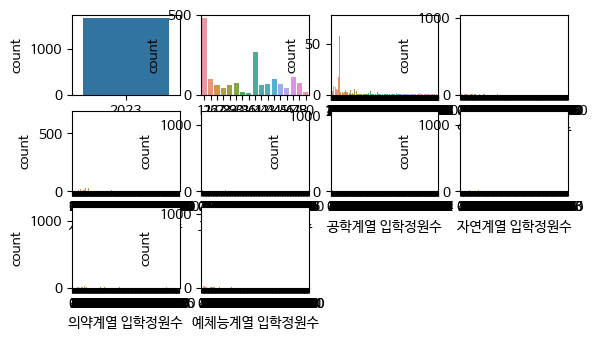

In [17]:
plt.subplot(4, 4, 1)
sns.countplot(data = data, x = "기준연도")

plt.subplot(4, 4, 2)
sns.countplot(data = data, x = "시도코드")

plt.subplot(4, 4, 3)
sns.countplot(data = data, x = "입학정원수(총계)")

plt.subplot(4, 4, 4)
sns.countplot(data = data, x = "인문계열 입학정원수")

plt.subplot(4, 4, 5)
sns.countplot(data = data, x = "사회계열 입학정원수")

plt.subplot(4, 4, 6)
sns.countplot(data = data, x = "교육계열 입학정원수")

plt.subplot(4, 4, 7)
sns.countplot(data = data, x = "공학계열 입학정원수")

plt.subplot(4, 4, 8)
sns.countplot(data = data, x = "자연계열 입학정원수")

plt.subplot(4, 4, 9)
sns.countplot(data = data, x = "의약계열 입학정원수")

plt.subplot(4, 4, 10)
sns.countplot(data = data, x = "예체능계열 입학정원수")
plt.show()

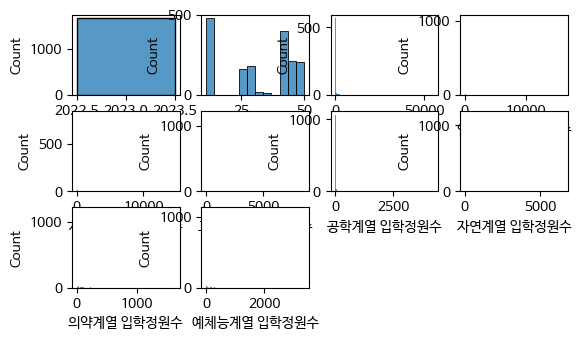

In [18]:
plt.subplot(4, 4, 1)
sns.histplot(data = data, x = "기준연도")

plt.subplot(4, 4, 2)
sns.histplot(data = data, x = "시도코드")

plt.subplot(4, 4, 3)
sns.histplot(data = data, x = "입학정원수(총계)")

plt.subplot(4, 4, 4)
sns.histplot(data = data, x = "인문계열 입학정원수")

plt.subplot(4, 4, 5)
sns.histplot(data = data, x = "사회계열 입학정원수")

plt.subplot(4, 4, 6)
sns.histplot(data = data, x = "교육계열 입학정원수")

plt.subplot(4, 4, 7)
sns.histplot(data = data, x = "공학계열 입학정원수")

plt.subplot(4, 4, 8)
sns.histplot(data = data, x = "자연계열 입학정원수")

plt.subplot(4, 4, 9)
sns.histplot(data = data, x = "의약계열 입학정원수")

plt.subplot(4, 4, 10)
sns.histplot(data = data, x = "예체능계열 입학정원수")
plt.show()

In [19]:
print(data["기준연도"].value_counts())
print(data["시도코드"].value_counts())
print(data["입학정원수(총계)"].value_counts())
print(data["인문계열 입학정원수"].value_counts())
print(data["사회계열 입학정원수"].value_counts())
print(data["교육계열 입학정원수"].value_counts())
print(data["공학계열 입학정원수"].value_counts())
print(data["자연계열 입학정원수"].value_counts())
print(data["의약계열 입학정원수"].value_counts())
print(data["예체능계열 입학정원수"].value_counts())

2023    1659
Name: 기준연도, dtype: int64
11    477
41    268
47    110
26    102
44     98
30     76
48     74
45     69
43     66
42     63
27     62
29     62
46     43
28     42
50     18
31     15
36     14
Name: 시도코드, dtype: int64
40      75
30      75
50      58
20      49
25      39
        ..
2575     1
1120     1
1703     1
1857     1
800      1
Name: 입학정원수(총계), Length: 601, dtype: int64
0      990
30      26
10      26
40      15
25      15
      ... 
451      1
702      1
599      1
339      1
210      1
Name: 인문계열 입학정원수, Length: 219, dtype: int64
0      661
10      28
20      27
50      25
40      25
      ... 
367      1
444      1
872      1
669      1
360      1
Name: 사회계열 입학정원수, Length: 319, dtype: int64
0      1156
40       20
30       19
20       16
2        13
       ... 
156       1
305       1
212       1
531       1
108       1
Name: 교육계열 입학정원수, Length: 175, dtype: int64
0       1009
30        15
25        14
3         12
40        12
        ... 
292        1
392   

In [20]:
data.describe()

,기준연도,시도코드,입학정원수(총계),인문계열 입학정원수,사회계열 입학정원수,교육계열 입학정원수,공학계열 입학정원수,자연계열 입학정원수,의약계열 입학정원수,예체능계열 입학정원수
count,1659.0,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,2023.0,30.913201,413.146474,52.881857,97.447257,29.884268,95.658831,43.095841,42.424352,51.754069
std,0.0,14.216860,1508.077940,421.549692,422.225649,221.188278,253.671340,192.942021,116.287385,156.169810
min,2023.0,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,11.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023.0,31.000000,80.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.0,43.000000,321.000000,28.000000,64.000000,13.000000,46.000000,13.000000,18.500000,25.000000
max,2023.0,50.000000,55050.000000,16010.000000,14700.000000,8590.000000,4240.000000,6500.000000,1630.000000,3380.000000


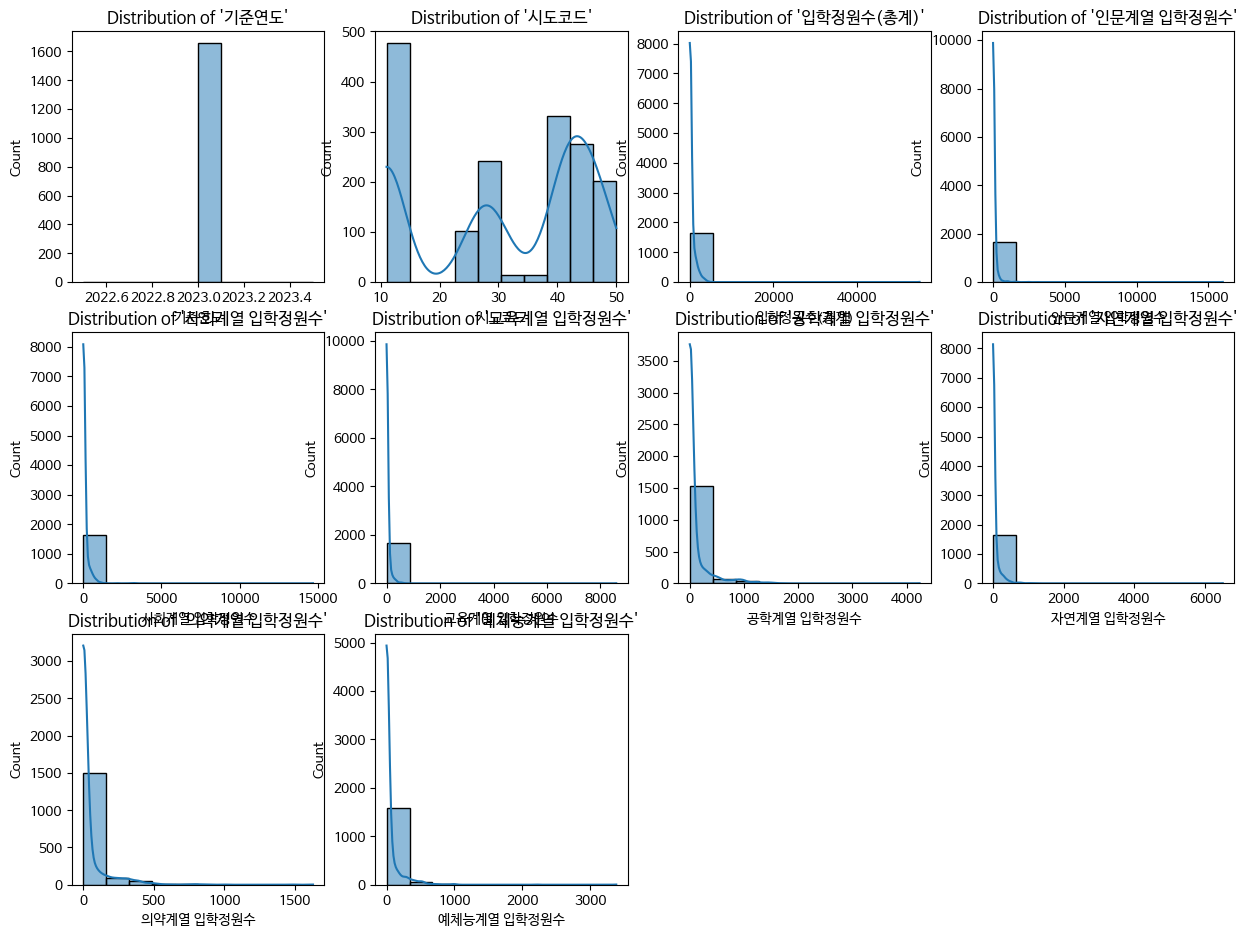

In [21]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      ).set(title = f"Distribution of '{num_columns[i]}'");

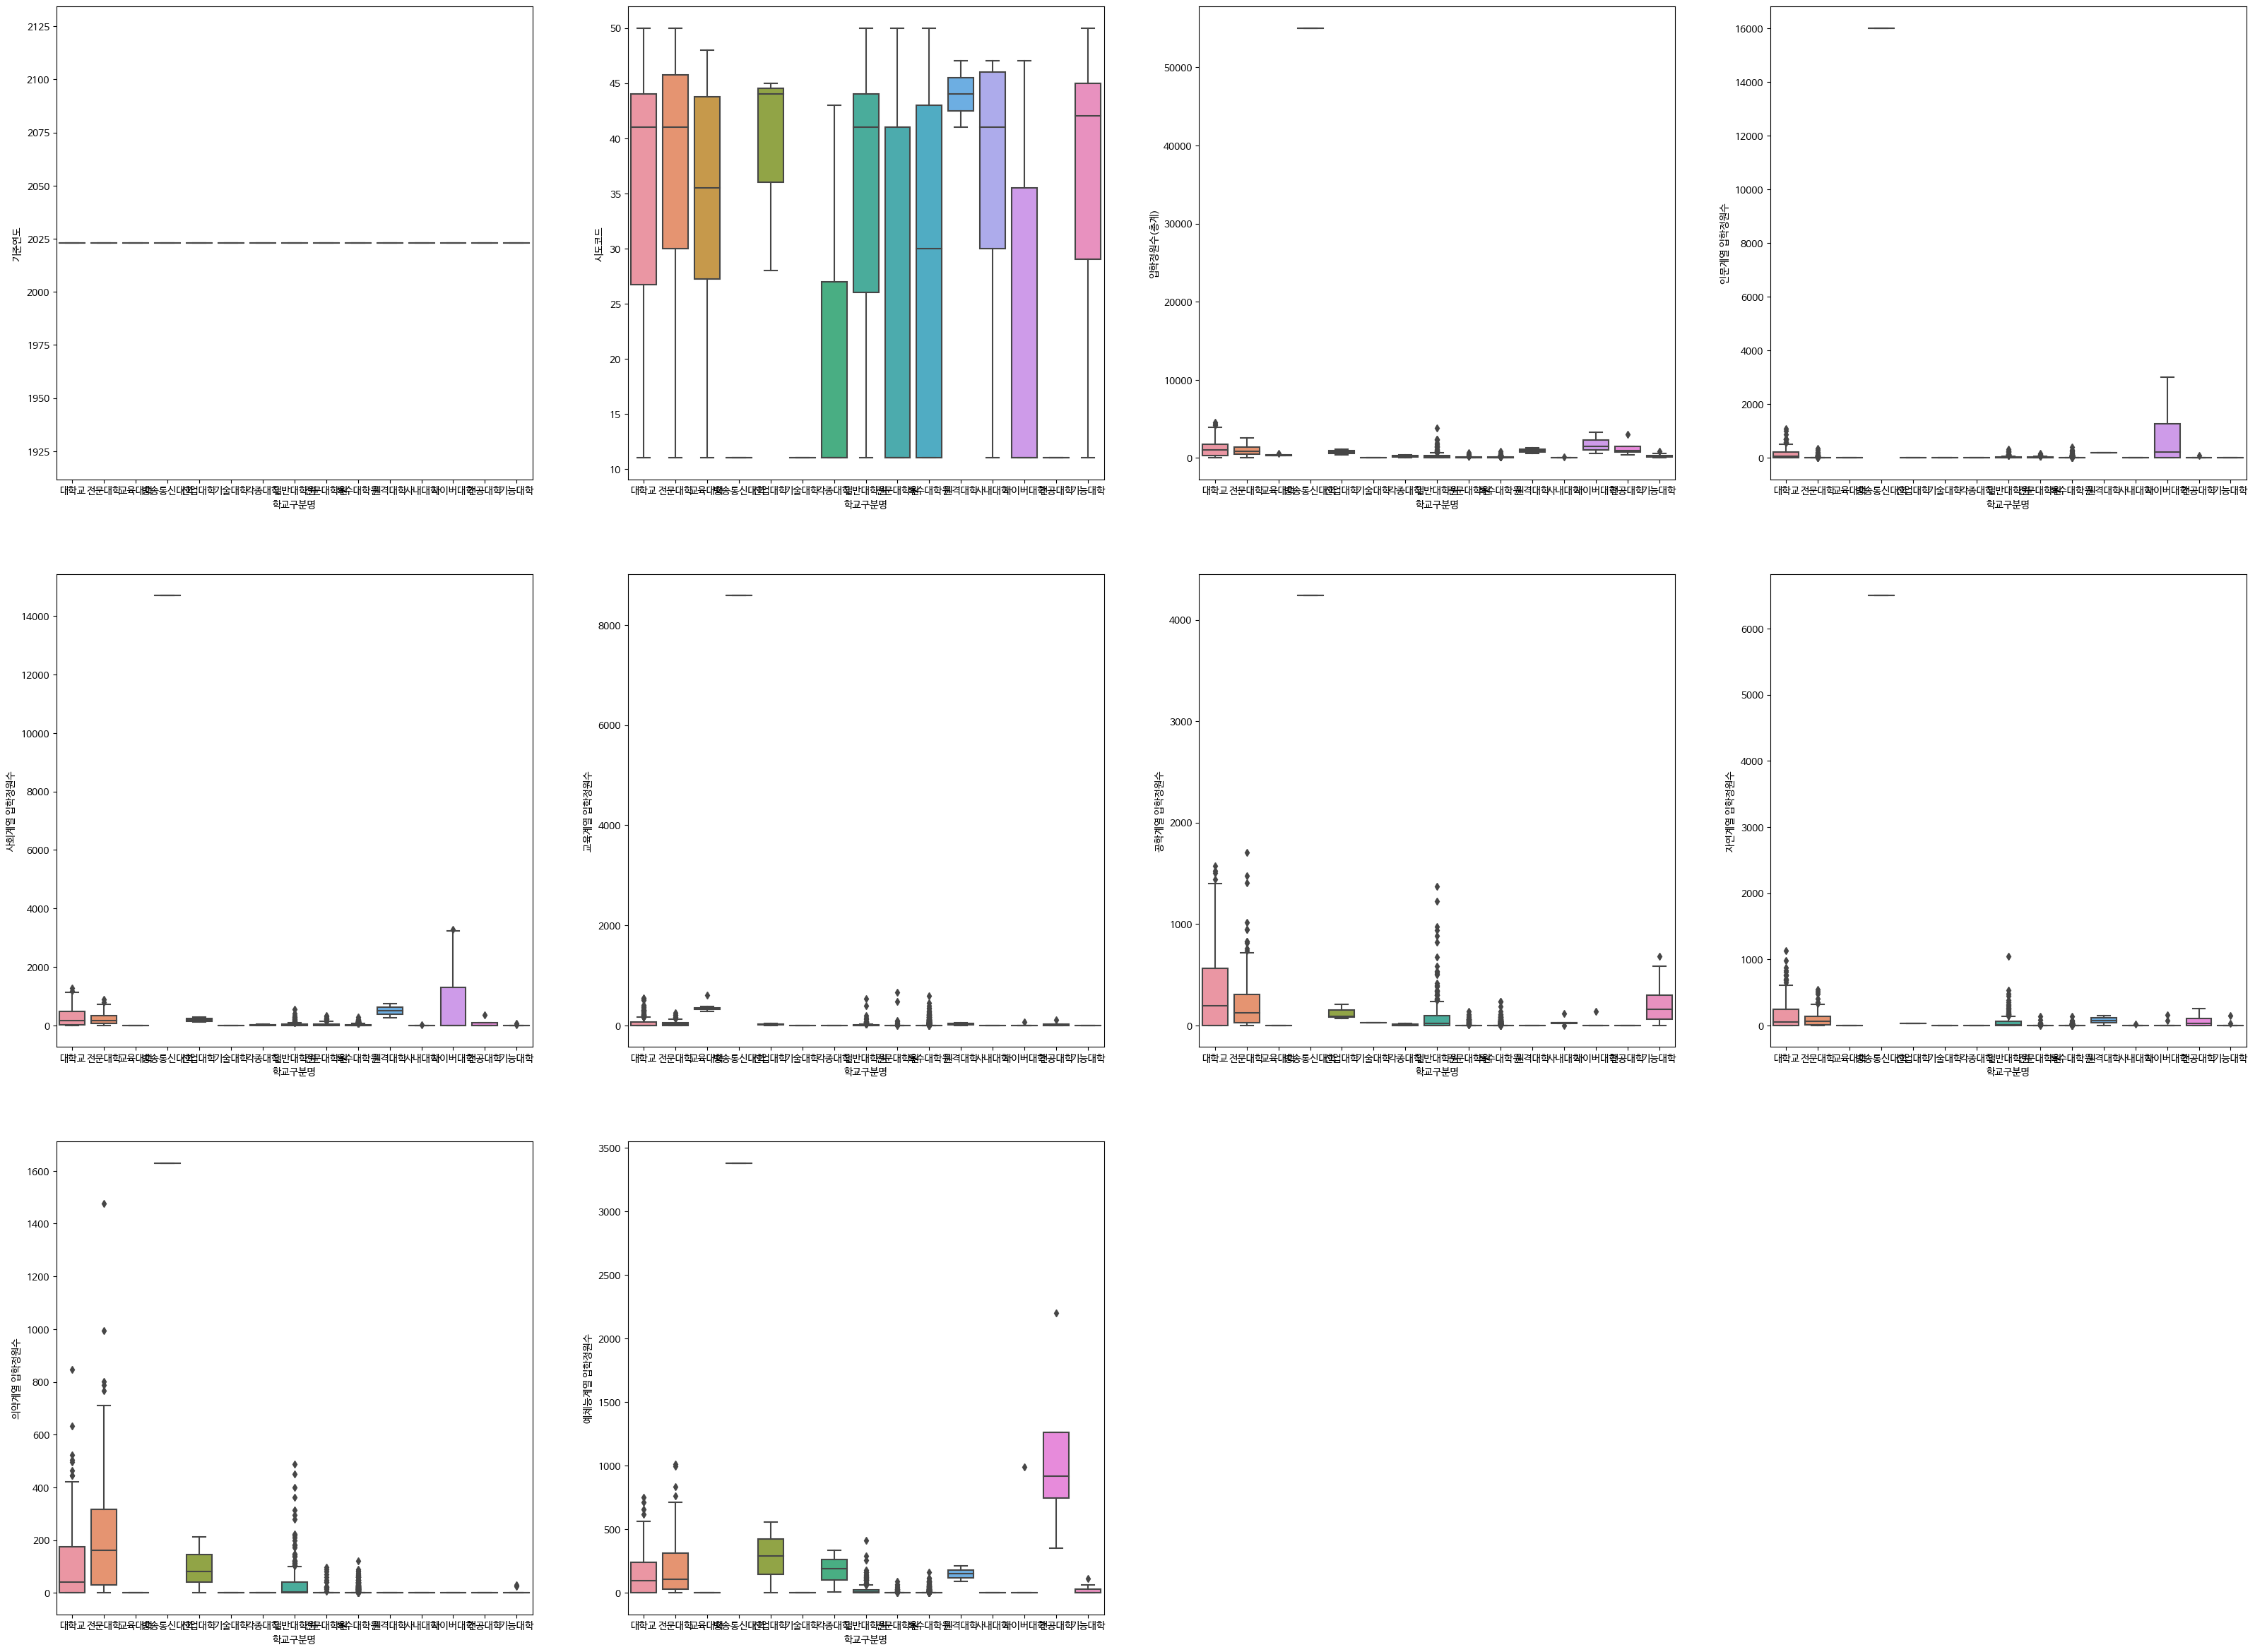

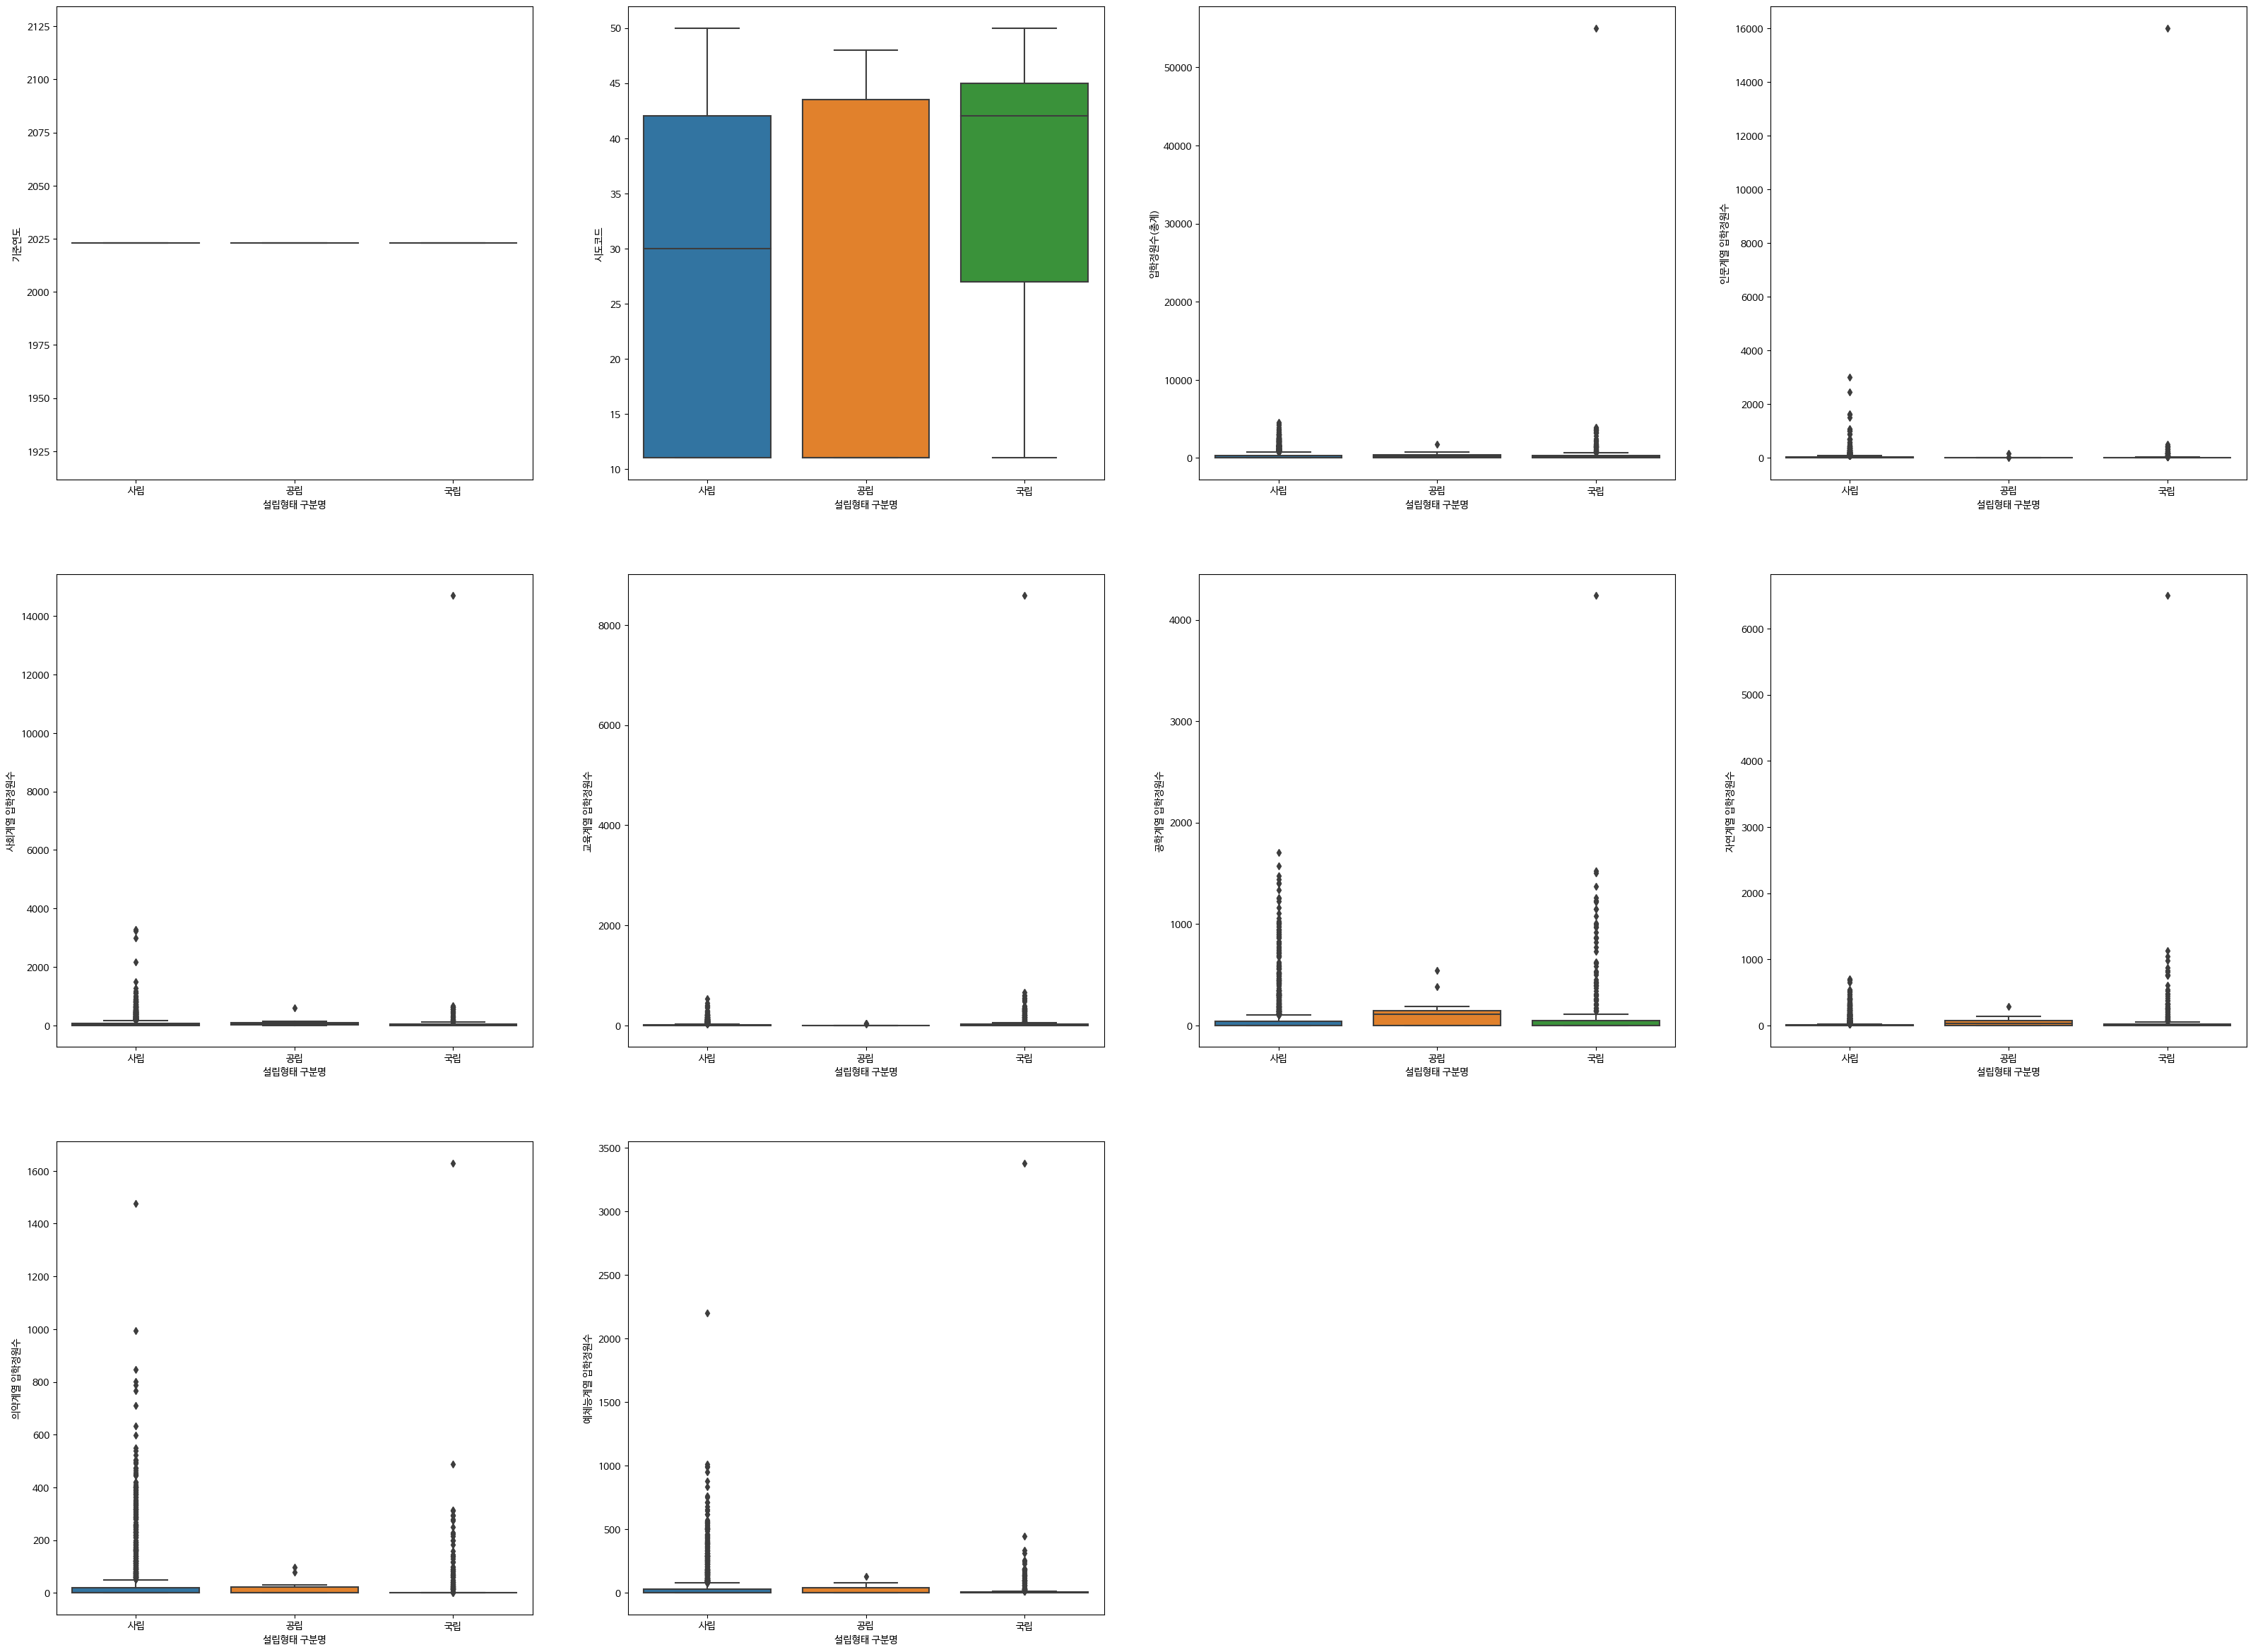

In [22]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "학교구분명", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "설립형태 구분명", y = num_columns[i])

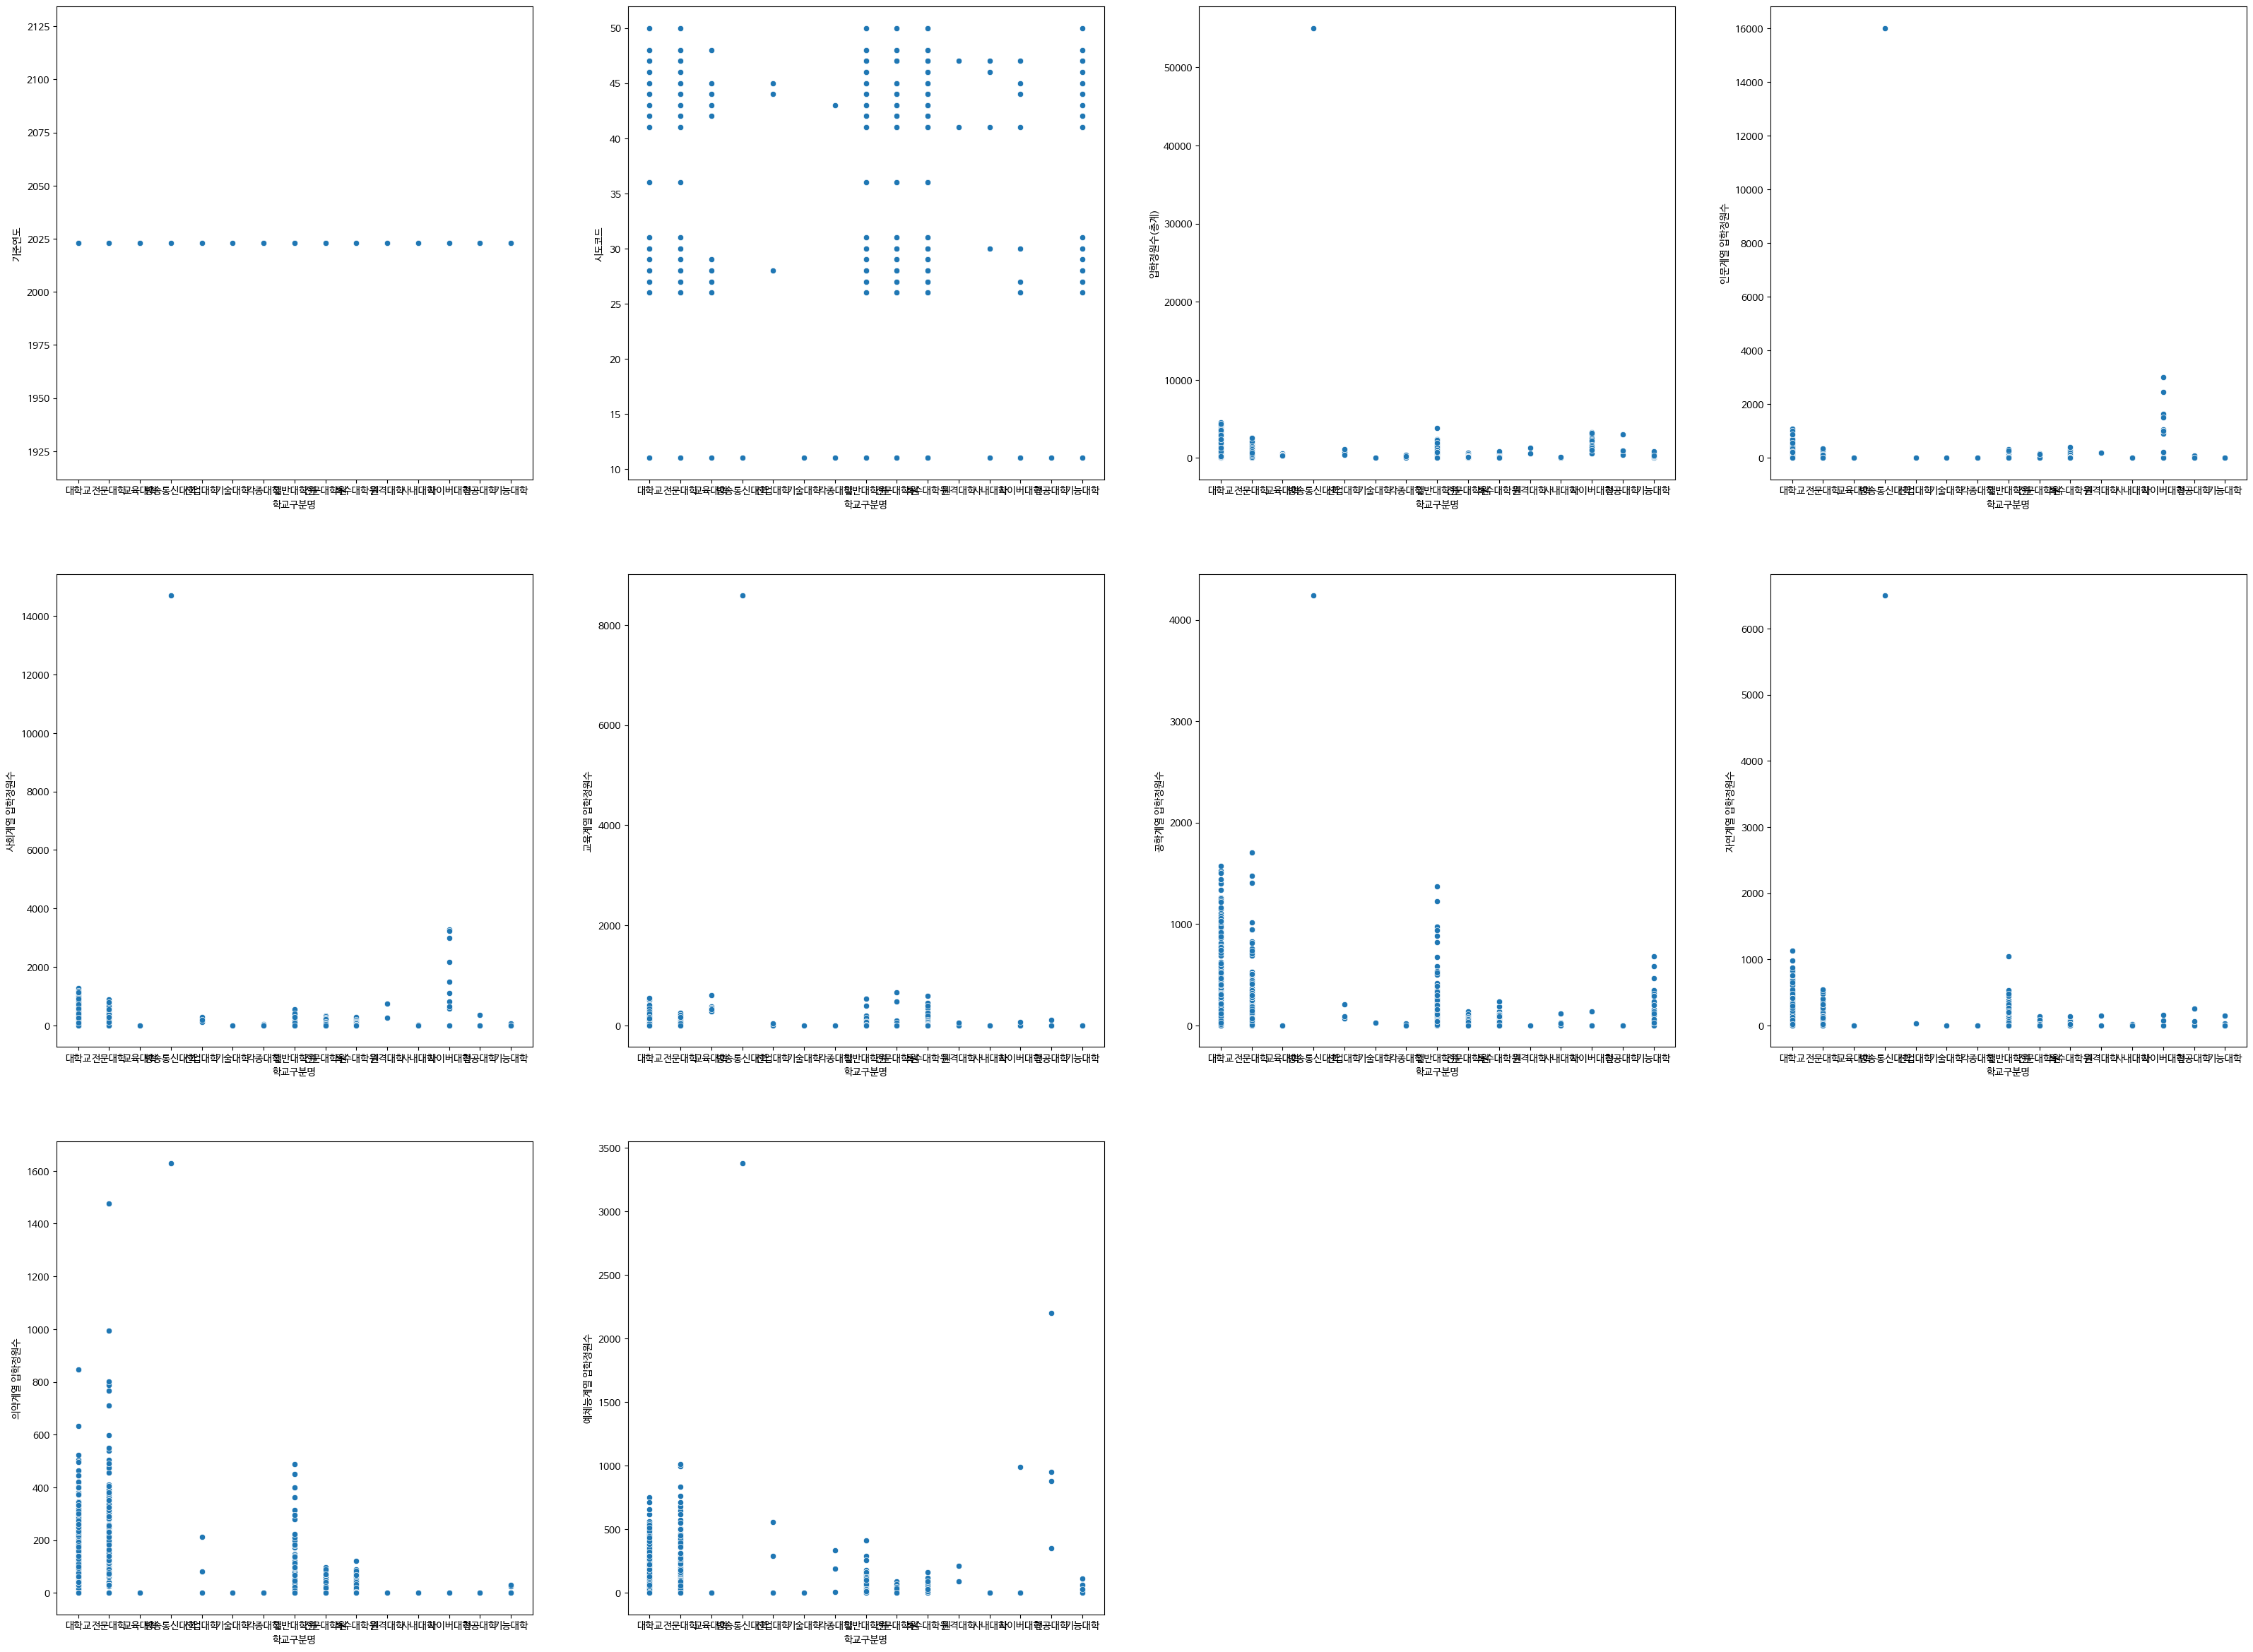

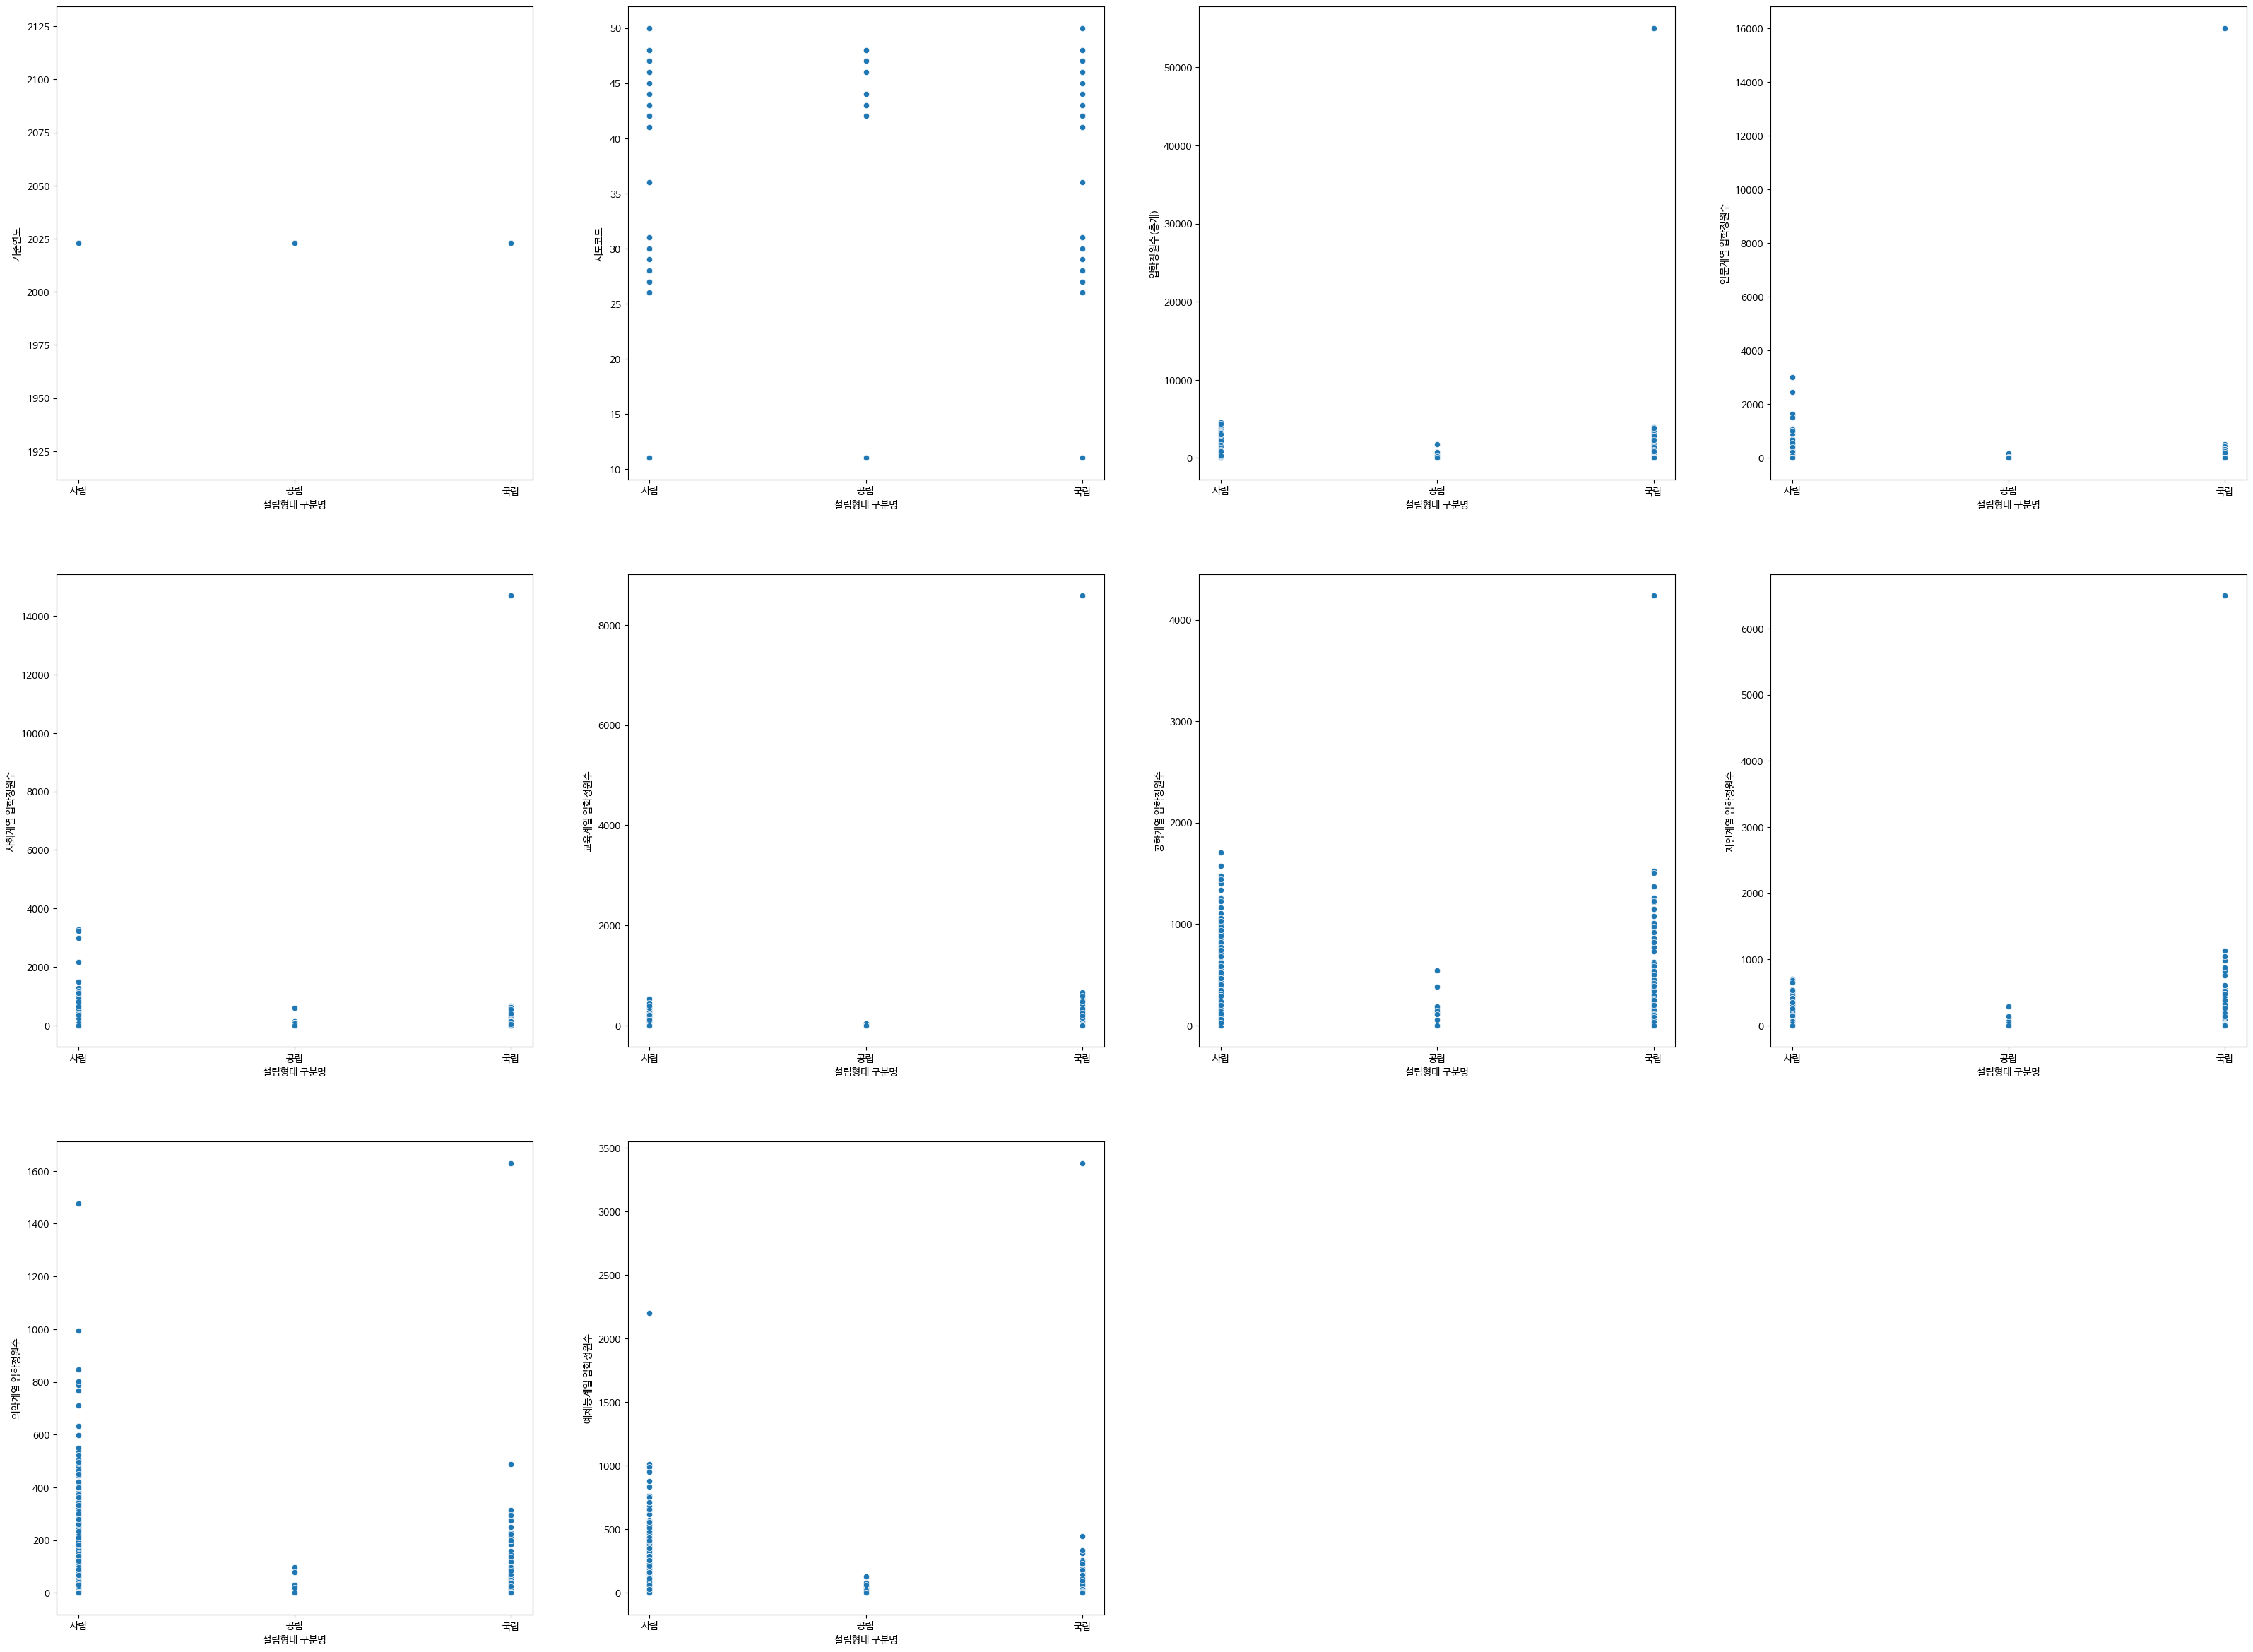

In [23]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "학교구분명", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "설립형태 구분명", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


IndexError: cannot do a non-empty take from an empty axes.

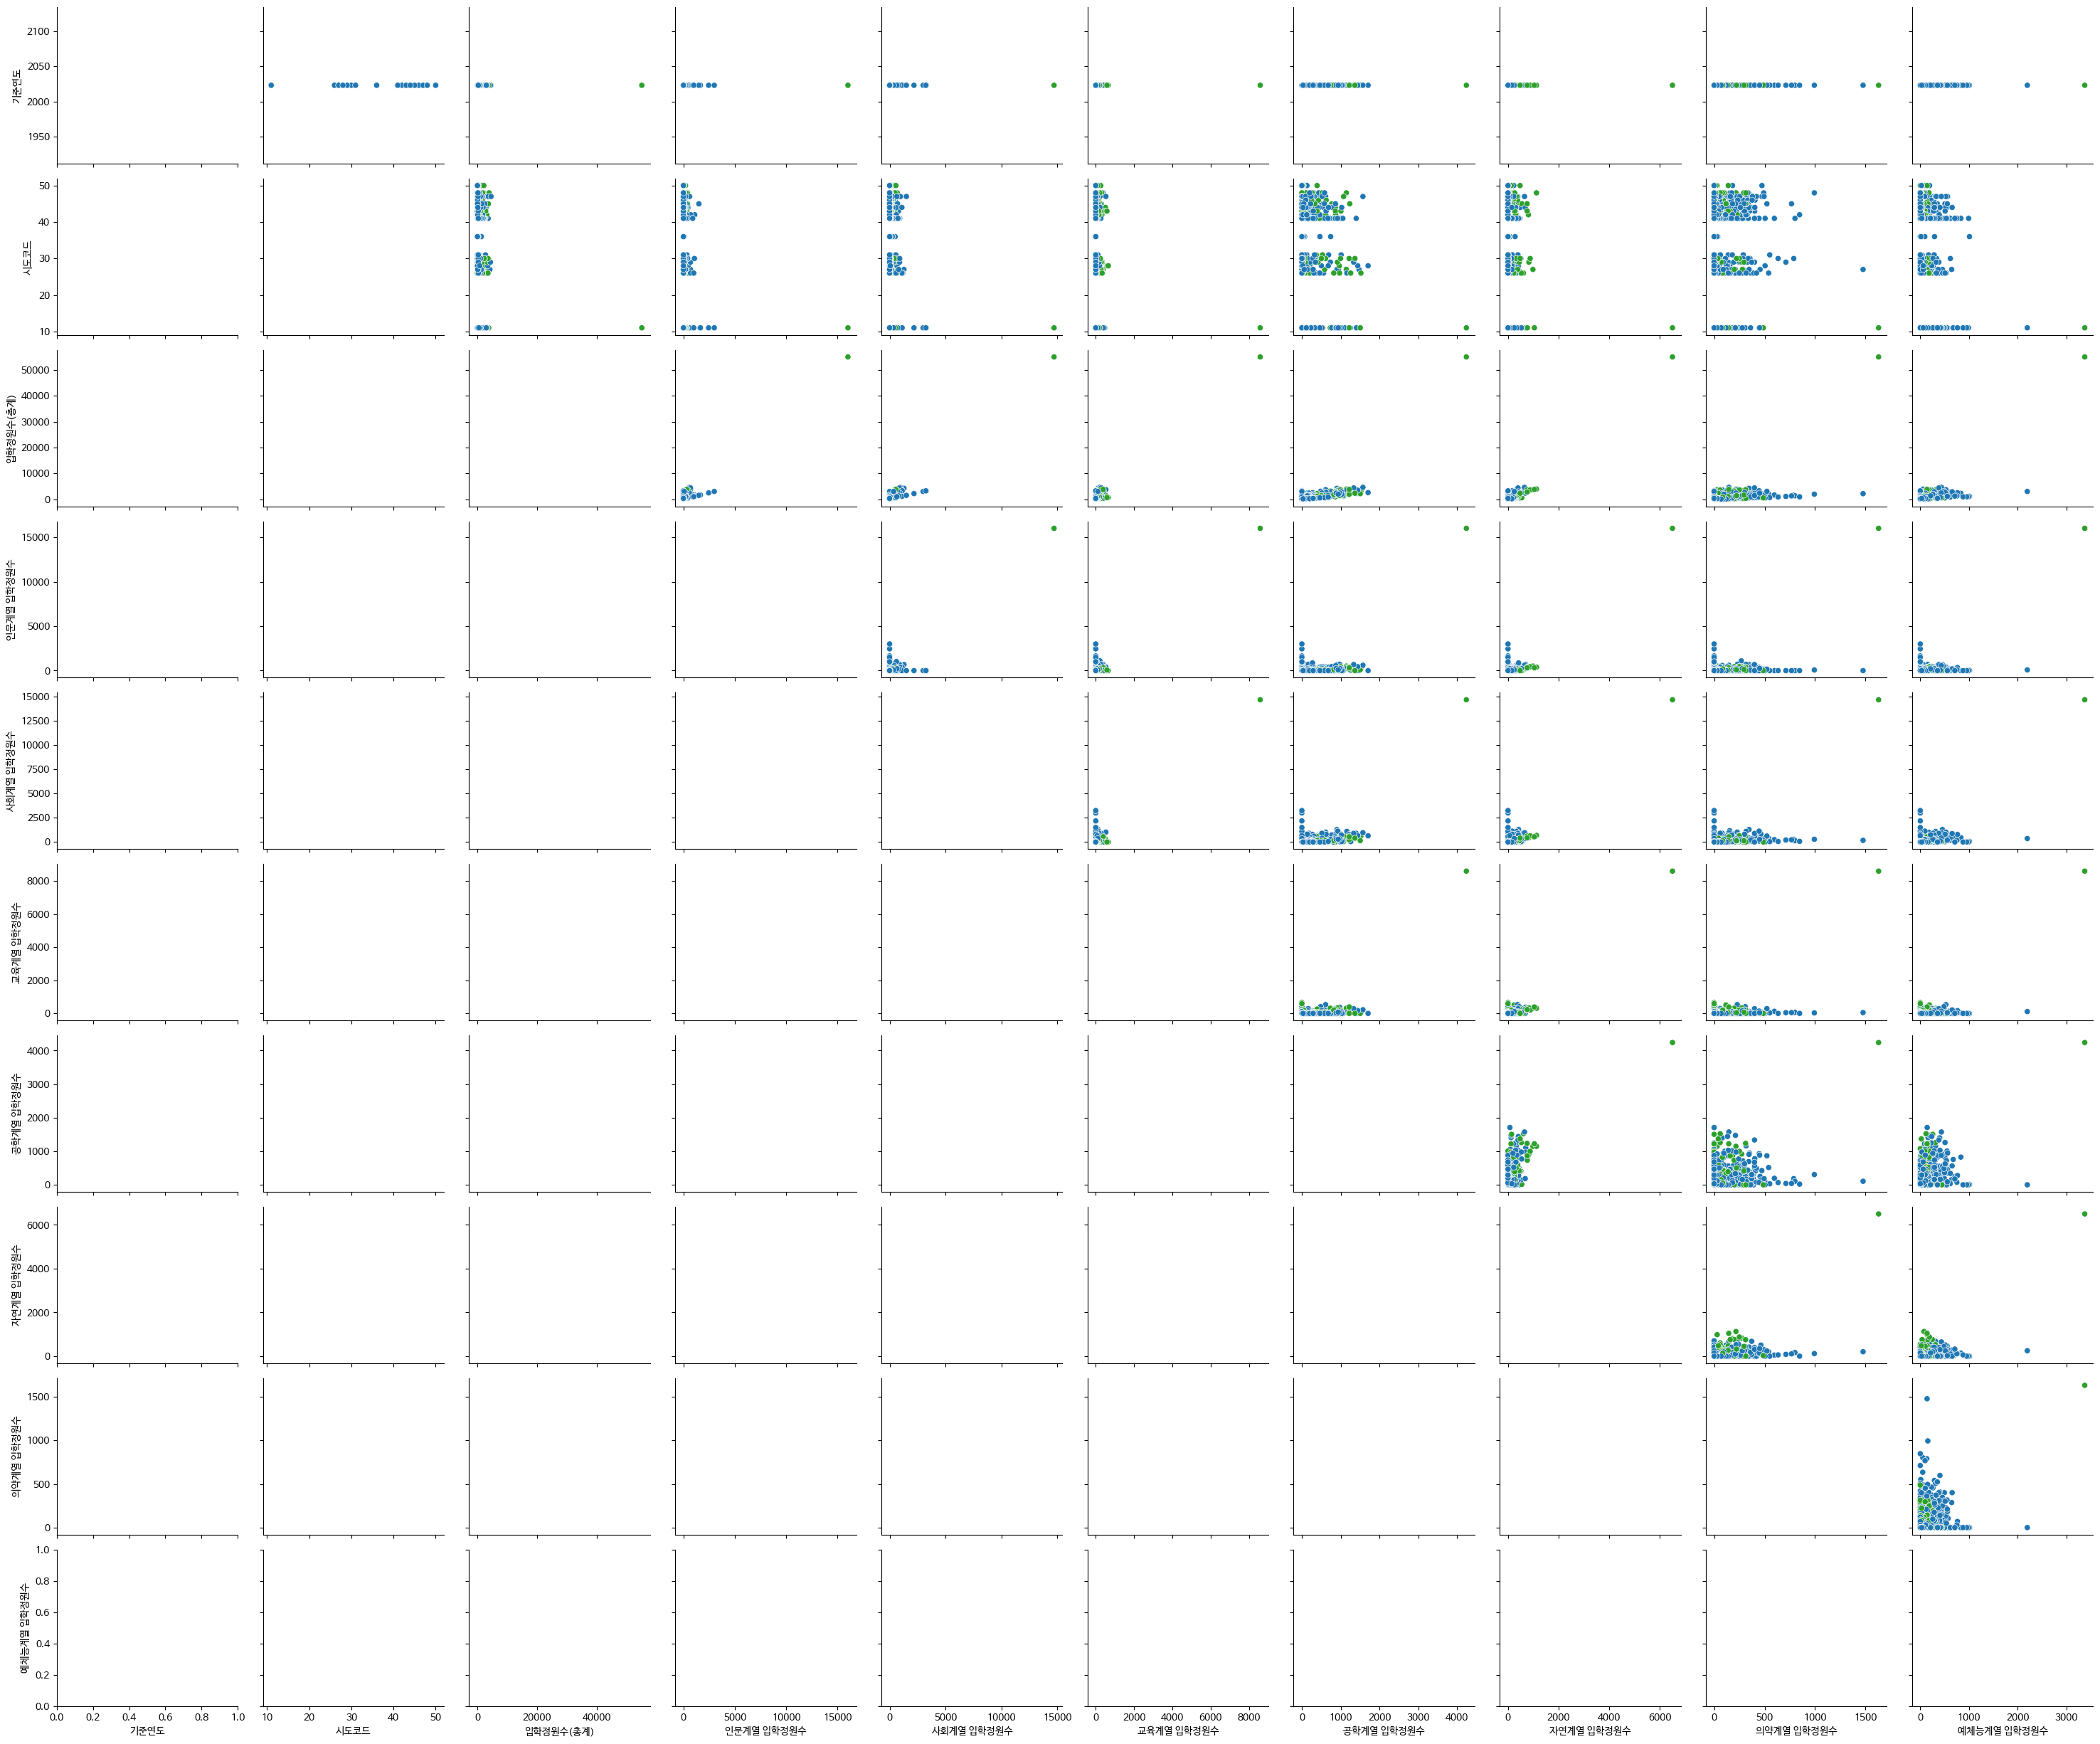

In [24]:
# ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "학교구분명")
# ax.map_upper(sns.scatterplot)
# ax.map_lower(sns.kdeplot)
# ax.map_diag(sns.histplot)

ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "설립형태 구분명")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [25]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

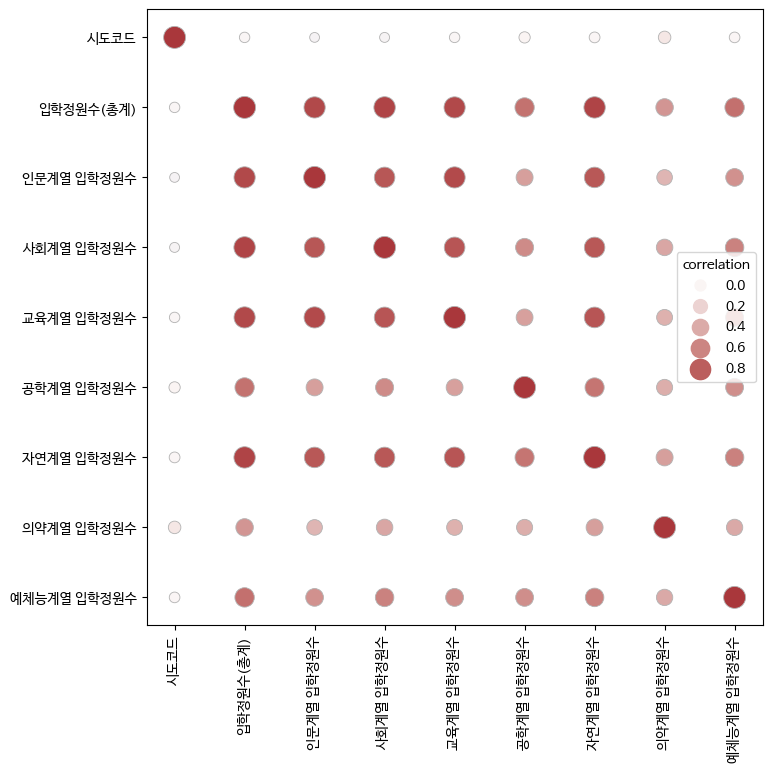

In [26]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

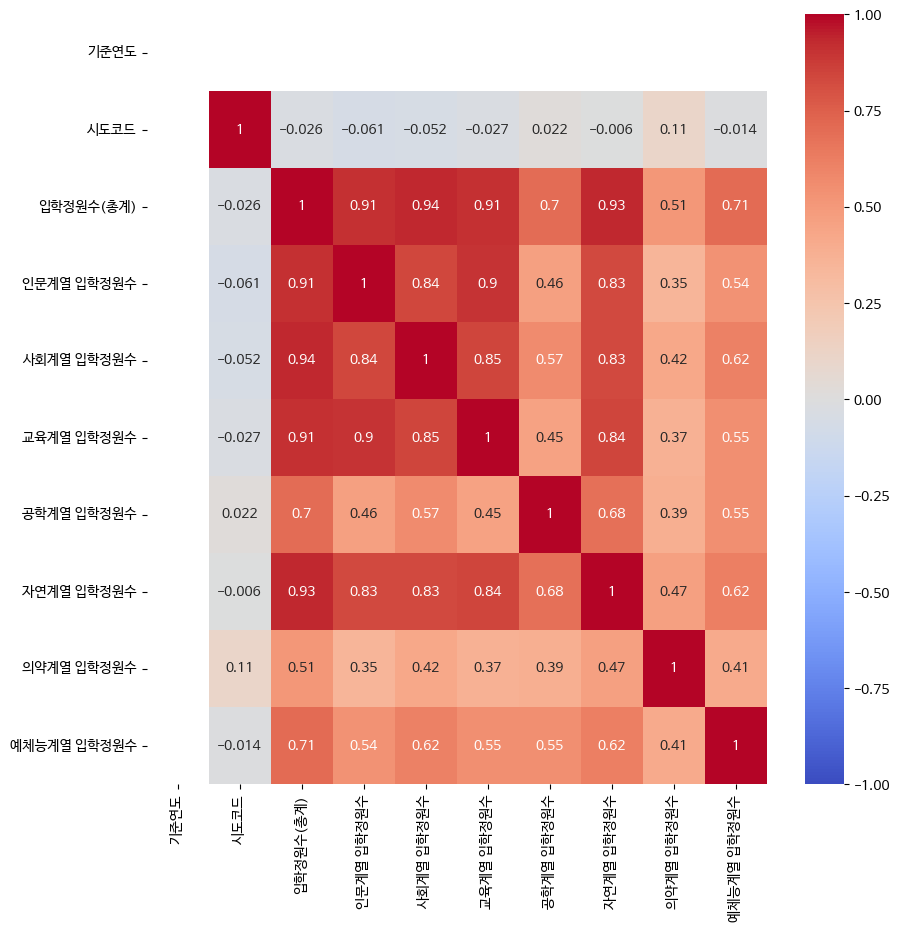

In [29]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()